## Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('medical_insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.drop('region', axis=1, inplace=True)

In [7]:
df.head()

age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520

In [8]:
df['sex'].replace({'female':0, 'male':1}, inplace=True)

In [9]:
df['smoker'].replace({'yes':0, 'no':1}, inplace=True)

In [10]:
df.head()

age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       0  16884.92400
1   18    1  33.770         1       1   1725.55230
2   28    1  33.000         3       1   4449.46200
3   33    1  22.705         0       1  21984.47061
4   32    1  28.880         0       1   3866.85520

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [12]:
x = df.drop('charges',axis=1)
y = df['charges']

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [14]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [15]:
# Testing data evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

r2 = r2_score(y_test,y_pred)
print('R2 Score: ', r2)

Mean Squared Error:  43026724.92591264
R2 Score:  0.7117729061298487


In [16]:
# Training data evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error: ',mse)

r2 = r2_score(y_train,y_pred_train)
print('R2 Score: ', r2)

Mean Squared Error:  0.0
R2 Score:  1.0


In [17]:
plt.figure(figsize=(200,200))
tree = plot_tree(dt_reg, feature_names=x.columns, filled=True )

## Hyperparameter Tunning

In [18]:
dt_reg = DecisionTreeRegressor()

hyp = {'criterion':['mse','mae'],
       'max_depth': np.arange(1,10),
       'min_samples_split':np.arange(2,20),
       'min_samples_leaf':np.arange(1,10)} 

gscv_dt_model = GridSearchCV(dt_reg,hyp,cv=5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [21]:
gscv_dt_model.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9)

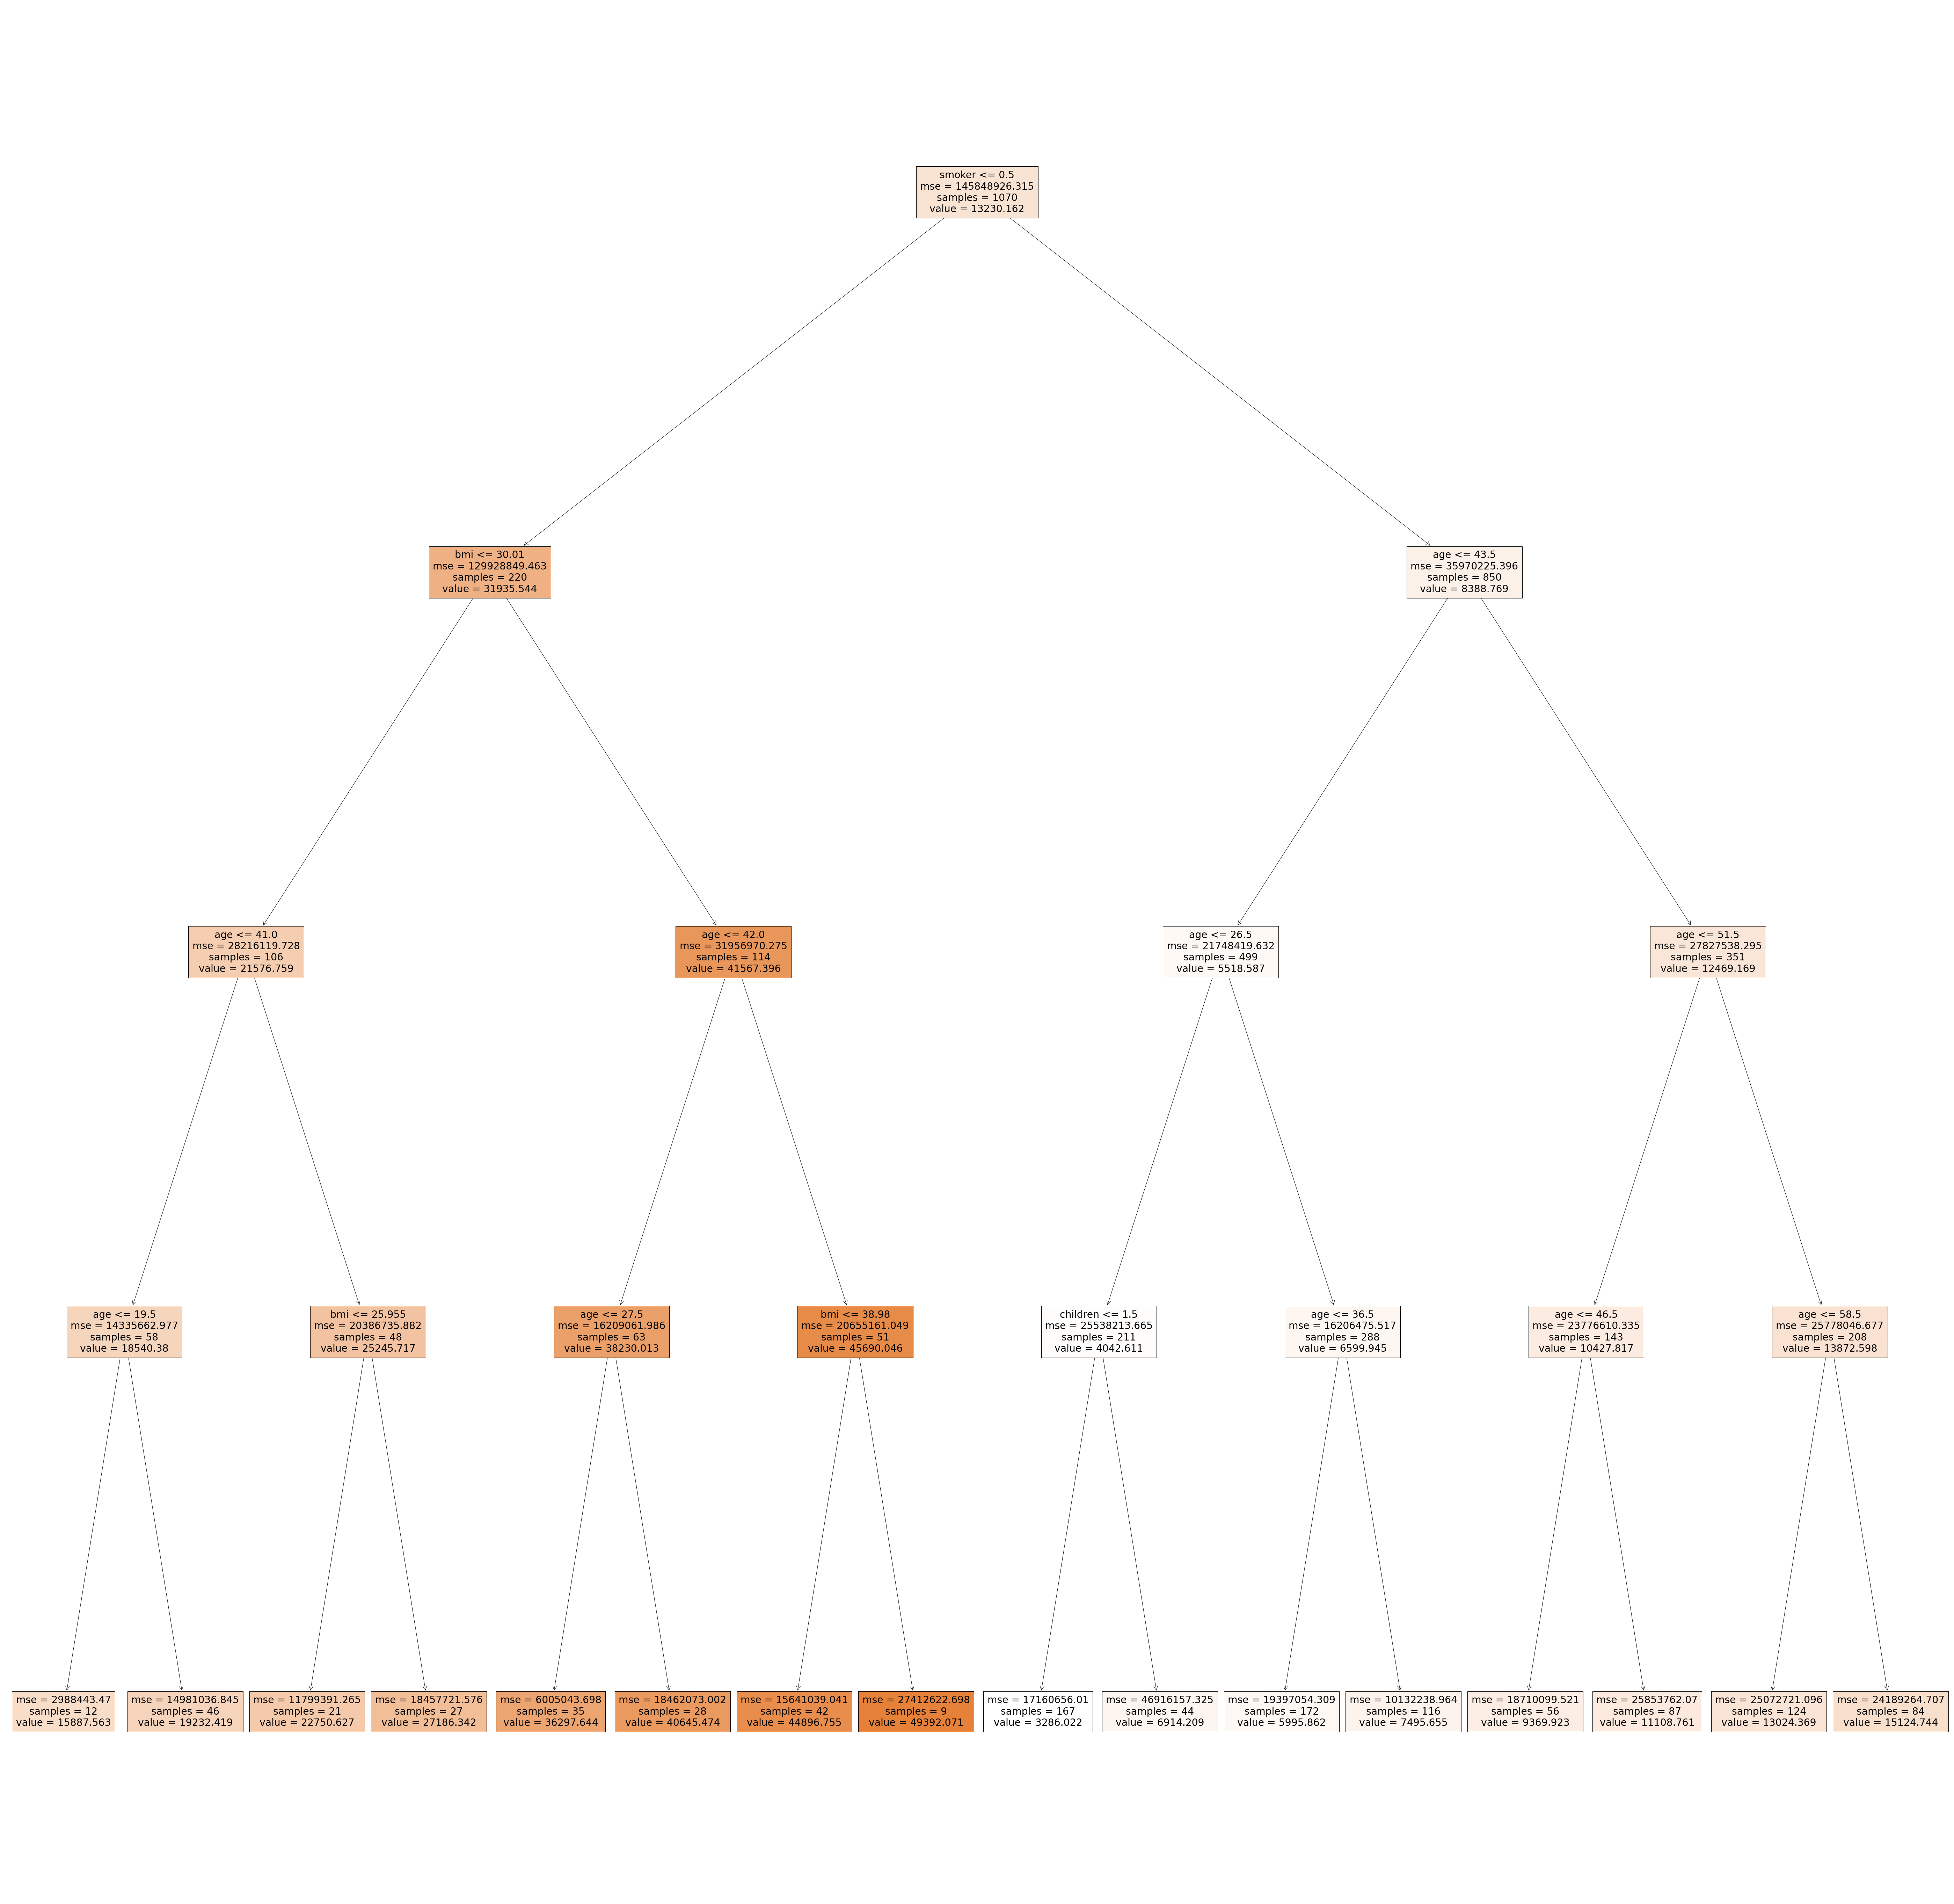

In [20]:
plt.figure(figsize=(100,100))
tree = plot_tree(gscv_dt_model.best_estimator_, feature_names=x.columns, filled=True )

## Prunning

In [ ]:
dt_reg.cost_complexity_pruning_path(x_train, y_train)

## Advantages

In [ ]:
1. can be used for classification n regression too.
2. Non-parametric algo
3. Robust to outliers
4. feature scaling not required much
5. Very good and it takes decisions as per humans takes decisions.

## Disadvantages

In [ ]:
1. get highly overfit
2. complex calculations
3. Must need hyperparameter tunning
4. More time complexity
5. Less effective for regression problems.
6. Tree is unstable.